In [85]:
#!pip install statsmodels

In [86]:
#!pip install psycopg2

In [87]:
#!pip install plotnine

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
import psycopg2

conn = psycopg2.connect(database="postgres",
                        host="18.204.57.173",
                        user="postgres",
                        password="&j>n!_nL]k&wWdE>*TVds4P6",
                        port="5432")

In [3]:
cursor = conn.cursor()

In [4]:
import pandas.io.sql as sqlio
data = sqlio.read_sql_query('SELECT * FROM \"public\".\"panel_zipcode_tf\"', conn)
# Now data is a pandas dataframe having the results of above query.
data.head()

C:\Users\jdayer\Anaconda3\envs\lawn\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,state,county,zipcode,city_neighborhood,year,polygon_area,water_area,lawn_area,tree_area,...,soil_area,turf_area,tree_ndvi_mean,tree_ndvi_max,tree_ndvi_min,grass_ndvi_mean,grass_ndvi_max,grass_ndvi_min,median_income,water_usage
0,1,CA,Los Angeles County,90001,Los Angeles,2010,3.073809e+06,0.0,536096.145294,419205.374676,...,1.883450e+06,0.0,0.625616,0.243933,0.065868,0.585903,0.224363,-0.569620,35097.0,0.0
1,2,CA,Los Angeles County,90002,Los Angeles,2010,3.286992e+06,0.0,565103.085483,480626.848806,...,1.869860e+06,0.0,0.791209,0.253252,0.064039,0.743017,0.239545,-0.862069,31258.0,0.0
2,3,CA,Los Angeles County,90003,Los Angeles,2010,3.708685e+06,0.0,493599.756755,402375.315911,...,2.176462e+06,0.0,0.748344,0.241827,0.063584,0.644444,0.226489,0.046358,29686.0,0.0
3,4,CA,Los Angeles County,90004,Los Angeles,2010,3.737537e+06,0.0,233807.175637,580552.334268,...,1.942550e+06,0.0,0.873418,0.287679,0.045977,0.940741,0.231025,0.037975,37976.0,0.0
4,5,CA,Los Angeles County,90005,Los Angeles,2010,1.524769e+06,0.0,69997.690573,253337.599360,...,5.856309e+05,0.0,0.884774,0.310294,0.025126,0.957447,0.230888,-0.035714,31893.0,0.0


In [5]:
# this does not have the right data for income
data[data['zipcode'] == '90001']

,id,state,county,zipcode,city_neighborhood,year,polygon_area,water_area,lawn_area,tree_area,...,soil_area,turf_area,tree_ndvi_mean,tree_ndvi_max,tree_ndvi_min,grass_ndvi_mean,grass_ndvi_max,grass_ndvi_min,median_income,water_usage
0,1,CA,Los Angeles County,90001,Los Angeles,2010,3.073809e+06,0.000000,536096.145294,4.192054e+05,...,1.883450e+06,0.000000,0.625616,0.243933,0.065868,0.585903,0.224363,-0.569620,35097.0,0.0
262,263,CA,Los Angeles County,90001,Los Angeles,2012,3.073809e+06,842.119100,11430.651934,2.642042e+04,...,6.796880e+03,1721.959536,0.744444,0.378506,0.115044,0.730570,0.451988,0.130742,35097.0,0.0
524,525,CA,Los Angeles County,90001,Los Angeles,2014,3.073809e+06,0.000000,83215.524379,1.009638e+05,...,1.520944e+05,567.049225,0.621359,0.337108,0.102410,0.666667,0.313119,0.073333,35097.0,0.0
786,787,CA,Los Angeles County,90001,Los Angeles,2016,3.073809e+06,0.000000,21728.297165,2.330775e+05,...,5.101036e+05,0.000000,0.511312,0.230989,0.037037,0.549180,0.262433,0.087500,35097.0,0.0
1046,1047,CA,Los Angeles County,90001,Los Angeles,2018,3.073809e+06,262.074998,22117.815213,5.836078e+04,...,1.886759e+03,473.647506,0.636364,0.349815,0.112033,0.644068,0.340483,0.100719,35097.0,0.0
1306,1432,CA,Los Angeles County,90001,Los Angeles,2020,8.878204e+06,661.678650,225107.597756,1.312926e+06,...,1.636435e+06,9595.472107,0.693780,0.278618,0.040462,0.662100,0.245586,0.073171,35097.0,0.0


In [6]:
data.columns

Index(['id', 'state', 'county', 'zipcode', 'city_neighborhood', 'year',
       'polygon_area', 'water_area', 'lawn_area', 'tree_area', 'pv_area',
       'impervious_area', 'soil_area', 'turf_area', 'tree_ndvi_mean',
       'tree_ndvi_max', 'tree_ndvi_min', 'grass_ndvi_mean', 'grass_ndvi_max',
       'grass_ndvi_min', 'median_income', 'water_usage'],
      dtype='object')

### Load Data

#### Load Landcover Data

In [7]:
lc = data[['zipcode','year','lawn_area','tree_area','polygon_area']]

In [8]:
lc = lc.sort_values(by=['zipcode','year'], ascending=True)

In [9]:
lc

,zipcode,year,lawn_area,tree_area,polygon_area
0,90001,2010,5.360961e+05,4.192054e+05,3.073809e+06
262,90001,2012,1.143065e+04,2.642042e+04,3.073809e+06
524,90001,2014,8.321552e+04,1.009638e+05,3.073809e+06
786,90001,2016,2.172830e+04,2.330775e+05,3.073809e+06
1046,90001,2018,2.211782e+04,5.836078e+04,3.073809e+06
...,...,...,...,...,...
1305,93551,2018,2.526522e+06,3.684106e+06,6.507298e+07
1589,93552,2020,9.987008e+06,8.634139e+06,1.770726e+08
1590,93553,2020,3.218187e+05,5.229903e+07,1.477662e+08
1591,93563,2020,1.447706e+06,8.065865e+07,1.927201e+08


In [10]:
# creates simple variables for vegetation(trees & grass)
lc['vegetation_area'] = lc['lawn_area']+lc['tree_area']

In [11]:
# creates percentages for each class
lc['trees_%']=lc['tree_area']/lc['polygon_area']*100
lc['grass_%']=lc['lawn_area']/lc['polygon_area']*100
lc['vegetation_%']=lc['vegetation_area']/lc['polygon_area']*100

In [12]:
def diff_column(df,column_name):
    '''Calculates delta from the consecutive 2 year period for a zipcode and a class'''
    df[column_name + '_delta'] = df[column_name] - df.groupby(['zipcode'])[column_name].shift()
    return df

In [13]:
feature_list = ['trees_%',
                'grass_%',
                'vegetation_%']
for feature in feature_list:
    diff_column(lc, feature)

In [14]:
lc

,zipcode,year,lawn_area,tree_area,polygon_area,vegetation_area,trees_%,grass_%,vegetation_%,trees_%_delta,grass_%_delta,vegetation_%_delta
0,90001,2010,5.360961e+05,4.192054e+05,3.073809e+06,9.553015e+05,13.637978,17.440777,31.078754,NaN,NaN,NaN
262,90001,2012,1.143065e+04,2.642042e+04,3.073809e+06,3.785107e+04,0.859533,0.371873,1.231406,-12.778444,-17.068904,-29.847348
524,90001,2014,8.321552e+04,1.009638e+05,3.073809e+06,1.841793e+05,3.284647,2.707245,5.991892,2.425114,2.335372,4.760486
786,90001,2016,2.172830e+04,2.330775e+05,3.073809e+06,2.548057e+05,7.582692,0.706885,8.289577,4.298045,-2.000359,2.297685
1046,90001,2018,2.211782e+04,5.836078e+04,3.073809e+06,8.047859e+04,1.898647,0.719557,2.618204,-5.684045,0.012672,-5.671373
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,93551,2018,2.526522e+06,3.684106e+06,6.507298e+07,6.210628e+06,5.661499,3.882597,9.544096,2.135941,0.113645,2.249586
1589,93552,2020,9.987008e+06,8.634139e+06,1.770726e+08,1.862115e+07,4.876044,5.640063,10.516107,NaN,NaN,NaN
1590,93553,2020,3.218187e+05,5.229903e+07,1.477662e+08,5.262085e+07,35.393087,0.217789,35.610876,NaN,NaN,NaN
1591,93563,2020,1.447706e+06,8.065865e+07,1.927201e+08,8.210635e+07,41.852735,0.751196,42.603930,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'vegetation_%_delta'}>]],
      dtype=object)

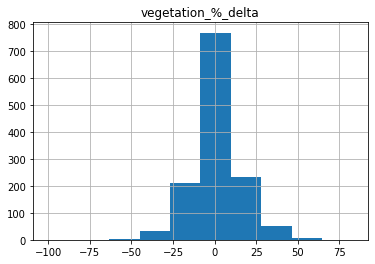

In [15]:
lc.hist(column='vegetation_%_delta')

<AxesSubplot:xlabel='polygon_area', ylabel='vegetation_%_delta'>

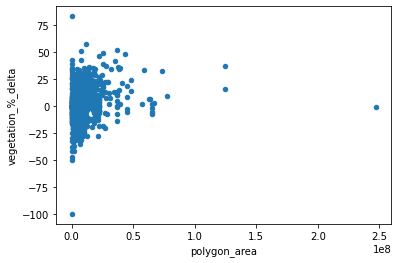

In [16]:
lc.plot.scatter(x = 'polygon_area', y = 'vegetation_%_delta')

In [17]:
#affluency = pd.read_csv('https://raw.githubusercontent.com/sudhrity/mids-w210-capstone/main/data/median_income.csv?token=GHSAT0AAAAAABSLF6ZX5AV5LWORMFQ23WQAYWEWKQQ')

In [18]:
#affluency.to_csv('affluency.csv')

In [19]:
affluency = pd.read_csv('affluency.csv')

In [20]:
aff = affluency.melt(id_vars =['zipcode'], value_vars =['y2010','y2012','y2014','y2016','y2018','y2020'])
aff['variable'] = aff['variable'].replace(['y2010','y2012','y2014','y2016','y2018','y2020'],['2010','2012','2014','2016','2018','2020'])
aff = aff.rename(columns = {'variable':'year', 'value':'median_income'})

In [21]:
aff

,zipcode,year,median_income
0,90001,2010,35097.0
1,90002,2010,31258.0
2,90003,2010,29686.0
3,90004,2010,37976.0
4,90005,2010,31893.0
...,...,...,...
2905,93584,2020,NaN
2906,93586,2020,NaN
2907,93590,2020,NaN
2908,93591,2020,48911.0


In [22]:
def diff_column_aff(df,column_name):
    '''Calculates delta from the consecutive 2 year period for a zipcode and a class'''
    df[column_name + '_delta'] = df[column_name] - df.groupby(['zipcode'])[column_name].shift()
    return df

In [23]:
diff_column_aff(aff,'median_income')

,zipcode,year,median_income,median_income_delta
0,90001,2010,35097.0,NaN
1,90002,2010,31258.0,NaN
2,90003,2010,29686.0,NaN
3,90004,2010,37976.0,NaN
4,90005,2010,31893.0,NaN
...,...,...,...,...
2905,93584,2020,NaN,NaN
2906,93586,2020,NaN,NaN
2907,93590,2020,NaN,NaN
2908,93591,2020,48911.0,2653.0


In [24]:
lc['zipcode'] = lc['zipcode'].astype(int)

In [25]:
display(lc.dtypes)

zipcode                 int32
year                   object
lawn_area             float64
tree_area             float64
polygon_area          float64
vegetation_area       float64
trees_%               float64
grass_%               float64
vegetation_%          float64
trees_%_delta         float64
grass_%_delta         float64
vegetation_%_delta    float64
dtype: object

In [26]:
display(aff.dtypes)

zipcode                  int64
year                    object
median_income          float64
median_income_delta    float64
dtype: object

In [27]:
df = lc.merge(aff, left_on=['year','zipcode'], right_on=['year','zipcode'])

In [28]:
df

,zipcode,year,lawn_area,tree_area,polygon_area,vegetation_area,trees_%,grass_%,vegetation_%,trees_%_delta,grass_%_delta,vegetation_%_delta,median_income,median_income_delta
0,90001,2010,5.360961e+05,4.192054e+05,3.073809e+06,9.553015e+05,13.637978,17.440777,31.078754,NaN,NaN,NaN,35097.0,NaN
1,90001,2012,1.143065e+04,2.642042e+04,3.073809e+06,3.785107e+04,0.859533,0.371873,1.231406,-12.778444,-17.068904,-29.847348,35658.0,561.0
2,90001,2014,8.321552e+04,1.009638e+05,3.073809e+06,1.841793e+05,3.284647,2.707245,5.991892,2.425114,2.335372,4.760486,34050.0,-1608.0
3,90001,2016,2.172830e+04,2.330775e+05,3.073809e+06,2.548057e+05,7.582692,0.706885,8.289577,4.298045,-2.000359,2.297685,34323.0,273.0
4,90001,2018,2.211782e+04,5.836078e+04,3.073809e+06,8.047859e+04,1.898647,0.719557,2.618204,-5.684045,0.012672,-5.671373,38521.0,4198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,93551,2018,2.526522e+06,3.684106e+06,6.507298e+07,6.210628e+06,5.661499,3.882597,9.544096,2.135941,0.113645,2.249586,92500.0,8500.0
1589,93552,2020,9.987008e+06,8.634139e+06,1.770726e+08,1.862115e+07,4.876044,5.640063,10.516107,NaN,NaN,NaN,66289.0,3028.0
1590,93553,2020,3.218187e+05,5.229903e+07,1.477662e+08,5.262085e+07,35.393087,0.217789,35.610876,NaN,NaN,NaN,62875.0,5042.0
1591,93563,2020,1.447706e+06,8.065865e+07,1.927201e+08,8.210635e+07,41.852735,0.751196,42.603930,NaN,NaN,NaN,200625.0,117969.0


### Afluency Hypothesis

array([[<AxesSubplot:title={'center':'median_income'}>]], dtype=object)

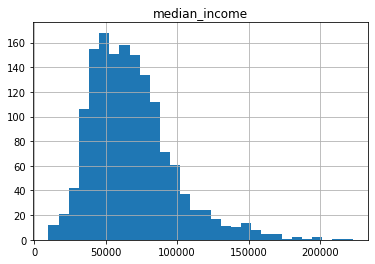

In [29]:
df.hist(column='median_income', bins=30)

In [30]:
df['median_income'].quantile([0.25, 0.5, 0.75])

0.25    47288.50
0.50    63266.50
0.75    83030.25
Name: median_income, dtype: float64

In [31]:
df['income_group'] = np.where(df['median_income']<47288.50, 'Less than 47K',
                              np.where(df['median_income']<63266.50, 'Less than 63K',
                              np.where(df['median_income']<83030.25, 'Less than 83K',
                              'More than 83K')))

In [32]:
df_aff = df.dropna()

In [33]:
year_cat = pd.get_dummies(df_aff, columns=['year'])  

In [34]:
df_aff_1 = pd.concat([df_aff, year_cat], axis=1)

In [35]:
df_aff_1.to_csv('df_aff_1.csv')

In [36]:
df_aff_1 = pd.read_csv('df_aff_1.csv')

In [37]:
df_aff_1['median_income_k'] = df_aff_1['median_income']/1000

In [38]:
df_aff_1['median_income_k_log'] = np.log(df_aff_1['median_income_k'])

In [39]:
df_aff_1['vegetation_%_delta_log'] = np.log(df_aff_1['vegetation_%_delta'])

C:\Users\jdayer\Anaconda3\envs\lawn\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jdayer\Anaconda3\envs\lawn\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
df_aff_1['median_income_delta_k'] = df_aff_1['median_income_delta']/1000

In [41]:
y = df_aff_1[['vegetation_%_delta']]

In [42]:
x = df_aff_1[['median_income_k','year_2012', 'year_2014', 'year_2016',
       'year_2018', 'year_2020']]

In [43]:
x = sm.add_constant(x)

In [44]:
model = sm.OLS(y, x)

In [45]:
results = model.fit()

In [46]:
rlm_model = sm.RLM(y, x, M=sm.robust.norms.HuberT())

rlm_results = rlm_model.fit()

In [47]:
print(rlm_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:     vegetation_%_delta   No. Observations:                 1232
Model:                            RLM   Df Residuals:                     1226
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 29 Jul 2022                                         
Time:                        18:03:43                                         
No. Iterations:                    23                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1183      0.511     

<AxesSubplot:xlabel='median_income_k', ylabel='vegetation_%_delta'>

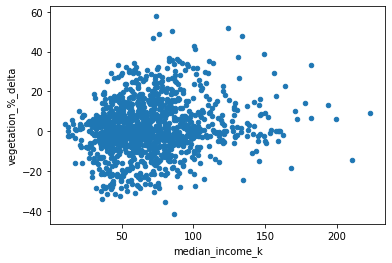

In [48]:
df_aff_1.plot.scatter(x = 'median_income_k', y = 'vegetation_%_delta')

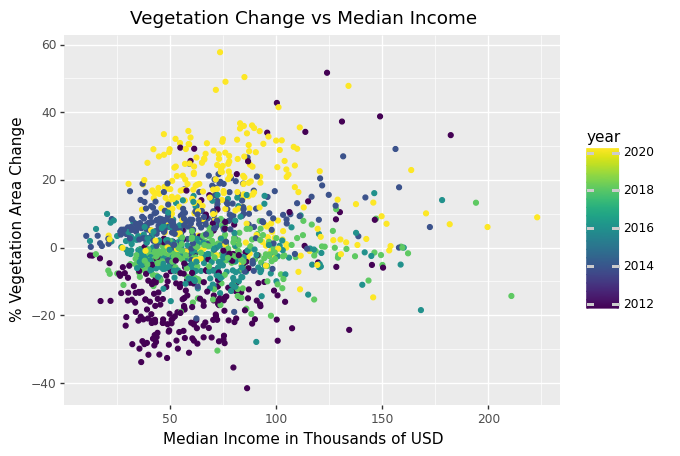

<ggplot: (112923338975)>

In [53]:
from plotnine import *
%matplotlib inline

(ggplot(df_aff_1)
 + aes(x='median_income_k', y='vegetation_%_delta', color='year', group = 'income_group')
 + geom_point()
 + labs(title='Vegetation Change vs Median Income', x='Median Income in Thousands of USD', y='% Vegetation Area Change')
)

In [50]:
df_aff_1

,Unnamed: 0,zipcode,year,lawn_area,tree_area,polygon_area,vegetation_area,trees_%,grass_%,vegetation_%,...,income_group.1,year_2012,year_2014,year_2016,year_2018,year_2020,median_income_k,median_income_k_log,vegetation_%_delta_log,median_income_delta_k
0,1,90001,2012,1.143065e+04,2.642042e+04,3.073809e+06,3.785107e+04,0.859533,0.371873,1.231406,...,Less than 47K,1,0,0,0,0,35.658,3.573974,NaN,0.561
1,2,90001,2014,8.321552e+04,1.009638e+05,3.073809e+06,1.841793e+05,3.284647,2.707245,5.991892,...,Less than 47K,0,1,0,0,0,34.050,3.527830,1.560350,-1.608
2,3,90001,2016,2.172830e+04,2.330775e+05,3.073809e+06,2.548057e+05,7.582692,0.706885,8.289577,...,Less than 47K,0,0,1,0,0,34.323,3.535816,0.831902,0.273
3,4,90001,2018,2.211782e+04,5.836078e+04,3.073809e+06,8.047859e+04,1.898647,0.719557,2.618204,...,Less than 47K,0,0,0,1,0,38.521,3.651204,NaN,4.198
4,5,90001,2020,2.251076e+05,1.312926e+06,8.878204e+06,1.538033e+06,14.788192,2.535508,17.323700,...,Less than 63K,0,0,0,0,1,48.011,3.871430,2.688221,9.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1582,93544,2020,1.650096e+06,3.811678e+06,2.471197e+08,5.461774e+06,1.542442,0.667732,2.210174,...,Less than 47K,0,0,0,0,1,38.523,3.651255,NaN,-5.633
1228,1585,93551,2012,4.582168e+06,8.548002e+06,6.507298e+07,1.313017e+07,13.136024,7.041584,20.177608,...,Less than 83K,1,0,0,0,0,82.463,4.412350,NaN,1.800
1229,1586,93551,2014,4.639646e+06,3.922483e+06,6.507298e+07,8.562129e+06,6.027822,7.129912,13.157734,...,More than 83K,0,1,0,0,0,85.200,4.445001,NaN,2.737
1230,1587,93551,2016,2.452570e+06,2.294185e+06,6.507298e+07,4.746755e+06,3.525558,3.768952,7.294510,...,More than 83K,0,0,1,0,0,84.000,4.430817,NaN,-1.200


In [55]:
df_aff_group = df_aff_1[['vegetation_%','vegetation_%_delta','median_income','income_group','year']].groupby(['income_group','year']).mean().reset_index()

In [56]:
df_group = df[['vegetation_%','vegetation_%_delta','median_income','income_group','year']].groupby(['income_group','year']).mean().reset_index()

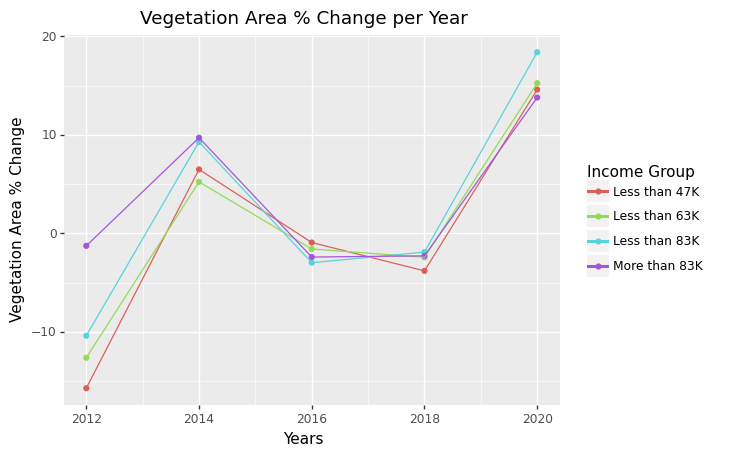

<ggplot: (112923525211)>

In [64]:
%matplotlib inline

(ggplot(df_aff_group)
 + aes(x='year', y='vegetation_%_delta', color='income_group')
 + geom_point()
 + geom_line()
 + labs(title='Vegetation Area % Change per Year', x='Years', y='Vegetation Area % Change',  color='Income Group')
)


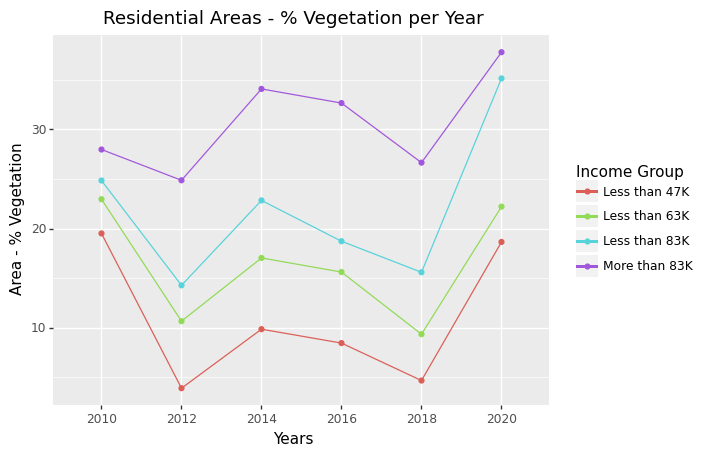

<ggplot: (112923670956)>

In [63]:
%matplotlib inline

(ggplot(df_group)
 + aes(x='year', y='vegetation_%', color='income_group', group = 'income_group')
 + geom_point()
 + geom_line()
 + labs(title='Residential Areas - % Vegetation per Year', x='Years', y='Area - % Vegetation', color='Income Group')
)


<AxesSubplot:xlabel='median_income_k', ylabel='vegetation_%_delta'>

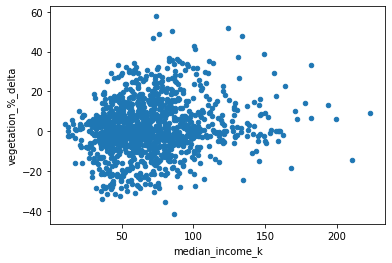

In [57]:
df_aff_1.plot.scatter(x = 'median_income_k', y = 'vegetation_%_delta')

In [58]:
df_aff_1.to_csv('results_lawn_final.csv')